In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#!pip install jinja2

##### Ejercicio 1

Ejercicio 1: Aplicando la Transformada Z, y utilizando la propiedad de desplazamiento en el tiempo, determine la función de transferencia H(z) de los siguientes sistemas LTI causales:

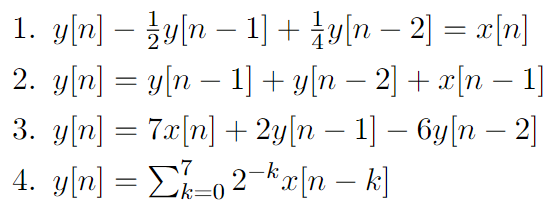

---

Utilizamos las propiedades de linealidad y desplazamiento

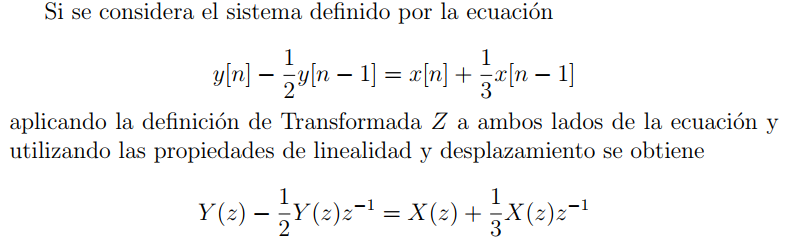

para obtener una expresión de $H(z) = \frac{Y(z)}{X(z)}$ .

##### Ejercicio 2

Encuentre la *respuesta en frecuencia* de los sistemas anteriores suponiendo una frecuencia de muestreo de 10kHz. Tenga en cuenta la relación entre la Transformada Z y la Transformada de Fourier.

---
La Transformada Z y la Transformada de Fourier están relacionadas evaluando la Transformada Z sobre el círculo unitario ($|z|=1$):

$$
Z\{x[n]\} = X(z) = \sum_{n=-\infty}^{\infty} x[n]z^{-n}
$$

Si $z = e^{j\omega}$ = r(cos ω + j.sen ω) se obtiene la Transformada de Fourier:

$$
X(e^{j\omega}) = \sum_{n=-\infty}^{\infty} x[n]e^{-j\omega n}
$$

Por lo tanto,

$$
X(e^{j\omega}) = X(z)\big|_{z = e^{j\omega}}
$$

---
Se sabe también que la función de transferencia $H(z) = \frac{Y(z)}{X(z)}$ es la transformada Z de la respuesta al impulso h[n], al evaluarla en el circulo r=1 obtenemos la transformada de Fourier de la respuesta al impulso h[n] y recibe el nombre de *respuesta en frecuencia*.

$$
H(e^{j\omega}) = H(z)\big|_{z = e^{j\omega}}
$$

- La misma nos muestra cómo responde el sistema a cada frecuencia $\omega$ de entrada. Es decir, describe cómo se atenúan o amplifican las distintas componentes frecuenciales de la señal de entrada al pasar por el sistema. Esto nos sirve para analizar el comportamiento de filtros en el dominio de la frecuencia.

- Si esta evaluación se la realiza sobre una única vuelta del círculo unitario y a intervalos discretos determinados, entonces estamos en el caso de la Transformada Discreta de Fourier. Es decir la TDF se obtiene al evaluar la Transformada Z en $N$ puntos equiespaciados sobre el círculo unitario:

$$
X[k] = X(z)\big|_{z = e^{j\frac{2\pi}{N}k}}, \quad k = 0, 1, \ldots, N-1
$$



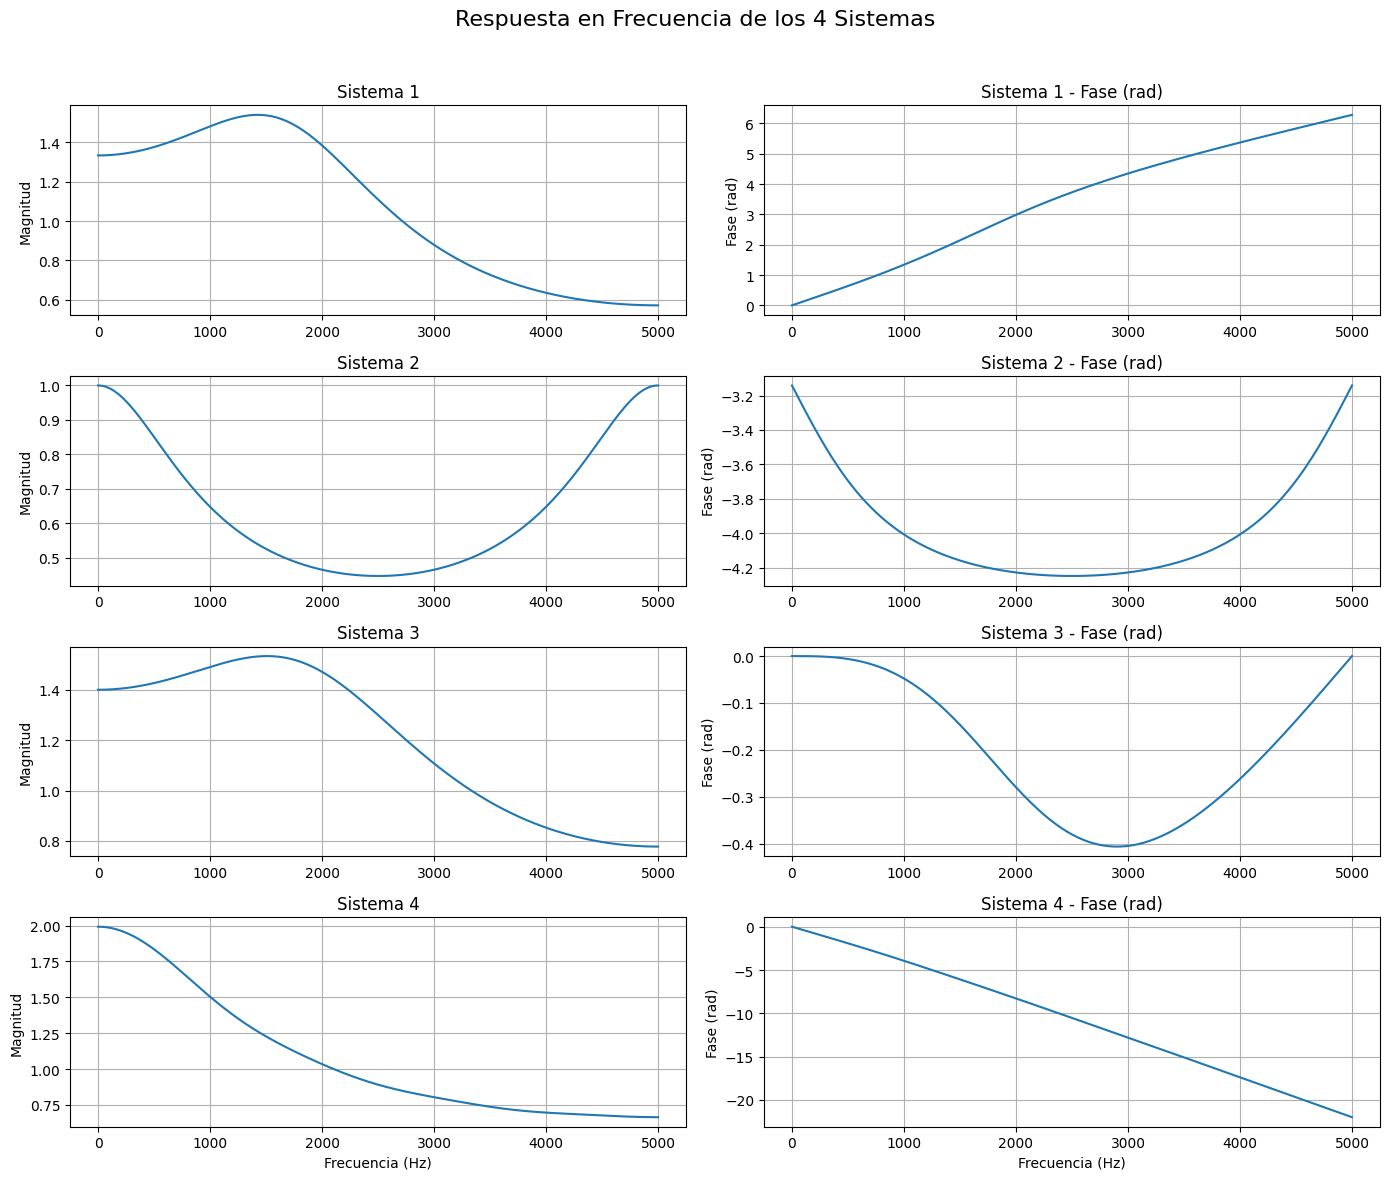

In [22]:
import numpy as np
import matplotlib.pyplot as plt

fs = 10000
# analizamos hasta ω = pi radianes en vez de 2*pi porque H es simétrica en el ciclo 0 a pi y pi a 2pi
# la frecuencia de muestreo es fs = 10000 Hz y la frecuencia de Nyquist es fs/2 = 5000 Hz
ω = np.linspace(0, np.pi, 1024)

# ω = 2 * pi * f / fs
#### f = frecuencia real en hz
#### fs = frecuencia de muestreo en hz
#### ω = frecuencia angular en radianes
# f = ω * fs / (2 * pi)
f = ω * fs / (2 * np.pi)  #frecuencia en hz

sistemas = [
    #H(z) = 1 / (1 - 1/2 z^{-1} + 1/4 z^{-2})
    ([1], [1, -0.5, 0.25]),
    #H(z) = z^{-1} / (1 - z^{-1} - z^{-2})
    ([0, 1, 0], [1, -1, -1]),
    #H(z) = 7 / (1 - 2 z^{-1} + 6 z^{-2})
    ([7], [1, -2, 6]),
    #H(z) = sum_{k=0}^{7} (1/2)^k z^{-k}
    ([0.5**k for k in range(8)], [1]),
]


fig, axs = plt.subplots(4, 2, figsize=(14, 12))
fig.suptitle("Respuesta en Frecuencia de los 4 Sistemas", fontsize=16)

for i, (b, a) in enumerate(sistemas):
    z = np.exp(1j * ω)
    # el z**-1 indica que el polinomio es en z^{-1}
    H = np.polyval(b, z**-1) / np.polyval(a, z**-1)
    # np.abs(H) es la magnitud de la respuesta en frecuencia
    # Se usa el valor absoluto porque la respuesta en frecuencia H puede ser compleja (tiene magnitud y fase).
    # El valor absoluto (np.abs(H)) nos da la magnitud de la respuesta en frecuencia, es decir, cuánto amplifica o atenúa el sistema cada frecuencia,
    # independientemente del desfase que introduce
    axs[i, 0].plot(f, np.abs(H))
    axs[i, 0].set_title(f"Sistema {i+1}")
    axs[i, 0].set_ylabel("Magnitud")
    axs[i, 0].grid(True)

    # np.unwrap(np.angle(H)) es la fase de la respuesta en frecuencia
    # np.angle(H) devuelve la fase de H en radianes, y np.unwrap() elimina los saltos de 2*pi para que la fase sea continua
    # el angulo de H es la fase de la respuesta en frecuencia, que indica el desfase introducido por el sistema a cada frecuencia
    axs[i, 1].plot(f, np.unwrap(np.angle(H)))
    axs[i, 1].set_title(f"Sistema {i+1} - Fase (rad)")
    axs[i, 1].set_ylabel("Fase (rad)")
    axs[i, 1].grid(True)


# Etiquetas comunes
for ax in axs[-1]:
    ax.set_xlabel("Frecuencia (Hz)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()